#May Lia Khoironisa

Submission 3-Time Data Series

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.callbacks import EarlyStopping
from pylab import rcParams

In [2]:
data_power= pd.read_csv('/content/power_usage_2016_to_2020.csv')
data_power.head()
data_power.info()                       
print('Shape of the data= ', data_power.shape)
print('Column datatypes= \n',data_power.dtypes)
data_power

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35952 entries, 0 to 35951
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   StartDate    35952 non-null  object 
 1   Value (kWh)  35952 non-null  float64
 2   day_of_week  35952 non-null  int64  
 3   notes        35952 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.1+ MB
Shape of the data=  (35952, 4)
Column datatypes= 
 StartDate       object
Value (kWh)    float64
day_of_week      int64
notes           object
dtype: object


StartDate  Value (kWh)  day_of_week    notes
0      2016-01-06 00:00:00        1.057            2  weekday
1      2016-01-06 01:00:00        1.171            2  weekday
2      2016-01-06 02:00:00        0.560            2  weekday
3      2016-01-06 03:00:00        0.828            2  weekday
4      2016-01-06 04:00:00        0.932            2  weekday
...                    ...          ...          ...      ...
35947  2020-07-07 19:00:00        1.307            1  weekday
35948  2020-07-07 20:00:00        2.872            1  weekday
35949  2020-07-07 21:00:00        2.138            1  weekday
35950  2020-07-07 22:00:00        2.199            1  weekday
35951  2020-07-07 23:00:00        1.809            1  weekday

[35952 rows x 4 columns]

In [3]:
data_power.isnull().sum()

StartDate      0
Value (kWh)    0
day_of_week    0
notes          0
dtype: int64

In [4]:
def plot_series(time, data, format="-", start=0, end=None):
    plt.plot(time[start:end], data_series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Data")
    plt.grid(True)

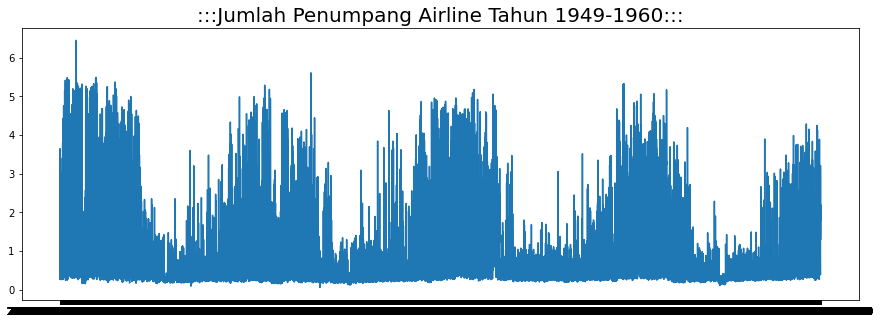

In [5]:
# Create a time series plot.
time = data_power['StartDate'].values
value  = data_power['Value (kWh)'].values
 
 
plt.figure(figsize=(15,5))
plt.plot(time, value)
plt.title(':::Jumlah Penumpang Airline Tahun 1949-1960:::',
          fontsize=20);

In [7]:
x=data_power['StartDate']
y=data_power['Value (kWh)']
print(x[:500],y[:500])

0      2016-01-06 00:00:00
1      2016-01-06 01:00:00
2      2016-01-06 02:00:00
3      2016-01-06 03:00:00
4      2016-01-06 04:00:00
              ...         
495    2016-06-21 15:00:00
496    2016-06-21 16:00:00
497    2016-06-21 17:00:00
498    2016-06-21 18:00:00
499    2016-06-21 19:00:00
Name: StartDate, Length: 500, dtype: object 0      1.057
1      1.171
2      0.560
3      0.828
4      0.932
       ...  
495    0.486
496    2.486
497    3.807
498    3.694
499    2.788
Name: Value (kWh), Length: 500, dtype: float64


In [8]:
#split data
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0,shuffle=False)

In [9]:
def windowed_dataset(data_series, window_size, batch_size, shuffle_buffer):
    data_series = tf.expand_dims(data_series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(data_series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

In [14]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
window_size = 64
batch_size = 256
shuffle_buffer_size = 1000
train_set = windowed_dataset(y_train, window_size, batch_size, shuffle_buffer_size)
print(train_set)
print(y_train.shape)

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=10, callbacks=[lr_schedule])

<PrefetchDataset shapes: ((None, None, 1), (None, None, 1)), types: (tf.float64, tf.float64)>
(28761,)
Epoch 1/10
113/113 [==============================] - 46s 373ms/step - loss: 2.1375 - mae: 2.5749
Epoch 2/10
113/113 [==============================] - 42s 374ms/step - loss: 2.0047 - mae: 2.4340
Epoch 3/10
113/113 [==============================] - 42s 373ms/step - loss: 1.9134 - mae: 2.3412
Epoch 4/10
113/113 [==============================] - 43s 376ms/step - loss: 1.8217 - mae: 2.2489
Epoch 5/10
113/113 [==============================] - 42s 372ms/step - loss: 1.7269 - mae: 2.1534
Epoch 6/10
113/113 [==============================] - 43s 381ms/step - loss: 1.6243 - mae: 2.0494
Epoch 7/10
113/113 [==============================] - 44s 388ms/step - loss: 1.5093 - mae: 1.9324
Epoch 8/10
113/113 [==============================] - 44s 390ms/step - loss: 1.3817 - mae: 1.8000
Epoch 9/10
113/113 [==============================] - 44s 383ms/step - loss: 1.2528 - mae: 1.6621
Epoch 10/10
113